In [1]:
# Import Libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format 

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

from scipy import stats 
from scipy.stats import shapiro

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#### import pandas as pd
#import glob

# Specify the path to the directory containing your CSV files
#csv_files = glob.glob(r'D:\Battery DS\01_Battery and Heating data in real driving cycles\1_Model_Output\Measured data\Input\Trip B\*.csv')

# Initialize an empty list to store DataFrames
#dfs = []

# Loop through each CSV file and append its data to the dfs list
#for csv_file in csv_files:
    #df = pd.read_csv(csv_file, encoding='latin-1')  # Change encoding if necessary
    #dfs.append(df)

# Concatenate all DataFrames in the list
#merged_data = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame to a new CSV file
#merged_data.to_csv(r'D:\Battery DS\01_Battery and Heating data in real driving cycles\1_Model_Output\Measured data\merged_file_B.csv', index=False)


In [3]:
Trip_B = pd.read_csv('merged_file_B.csv')

In [4]:
Trip_B.head()

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  Motor Torque [Nm]  \
0  0.000000         0.000000     449.000000      0.000000           0.000000   
1  0.100000         0.000000     449.000000      0.000000           0.000000   
2  0.200000         0.000000     449.000000      0.000000           0.000000   
3  0.300000         0.000000     449.000000      0.000000           0.000000   
4  0.400000         0.000000     449.000000      0.000000           0.000000   

   Longitudinal Acceleration [m/s^2]  Regenerative Braking Signal   \
0                          -0.329300                             0   
1                          -0.329300                             0   
2                          -0.358000                             0   
3                          -0.352350                             0   
4                          -0.343670                             0   

   Battery Voltage [V]  Battery Current [A]  Battery Temperature [°C]  \
0           388.800000           -19.061280                  7.000000   
1           388.800000           -19.061280                  7.000000   
2           388.800000           -18.861270                  7.000000   
3           388.800000           -18.690310                  7.000000   
4           388.800000           -18.640310                  7.000000   

   max. Battery Temperature [°C]  displayed SoC [%]  min. SoC [%]  \
0                              7         100.000000      8.000000   
1                              7         100.000000      8.000000   
2                              7         100.000000      8.000000   
3                              7         100.000000      8.000000   
4                              7         100.000000      8.000000   

   max. SoC [%)  Heating Power CAN [kW]  Heating Power LIN [W]  \
0     89.000000                7.000000            6860.000000   
1     89.000000                7.000000            6860.000000   
2     89.000000                7.000000            6857.458380   
3     89.000000                7.000000            6837.461380   
4     89.000000                7.000000            6814.953740   

   Requested Heating Power [W]  AirCon Power [kW]  Heater Signal  \
0                  6833.908000           0.000000              1   
1                  6833.908000           0.000000              1   
2                  6793.908000           0.000000              1   
3                  6756.969310           0.000000              1   
4                  6737.069800           0.000000              1   

   Heater Voltage [V]  Heater Current [A]  Ambient Temperature [°C]  \
0          390.000000           17.500000                  8.500000   
1          390.000000           17.500000                  8.500000   
2          390.000000           17.500000                  8.500000   
3          390.000000           17.500000                  8.500000   
4          390.000000           17.484230                  8.500000   

   Ambient Temperature Sensor [°C]  Coolant Temperature Heatercore [°C]  \
0                         9.563440                             9.000000   
1                         9.563440                             9.000000   
2                         9.559390                             9.000000   
3                         9.550660                             9.000000   
4                         9.541930                             9.000000   

   Requested Coolant Temperature [°C]  Coolant Temperature Inlet [°C]  \
0                                  85                        9.000000   
1                                  85                        9.000000   
2                                  85                        9.000000   
3                                  85                        9.000000   
4                                  85                        9.000000   

   Coolant Volume Flow +500 [l/h]  Heat Exchanger Temperature [°C]  \
0                     -500.190740                     

In [5]:
Trip_B.shape

(627092, 48)

In [6]:
Trip_B.dtypes

Time [s]                                  float64
Velocity [km/h]                           float64
Elevation [m]                             float64
Throttle [%]                              float64
Motor Torque [Nm]                         float64
Longitudinal Acceleration [m/s^2]         float64
Regenerative Braking Signal                 int64
Battery Voltage [V]                       float64
Battery Current [A]                       float64
Battery Temperature [°C]                  float64
max. Battery Temperature [°C]               int64
displayed SoC [%]                         float64
min. SoC [%]                              float64
max. SoC [%)                              float64
Heating Power CAN [kW]                    float64
Heating Power LIN [W]                     float64
Requested Heating Power [W]               float64
AirCon Power [kW]                         float64
Heater Signal                               int64
Heater Voltage [V]                        float64


In [7]:
Trip_B.describe()

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  \
count 627092.000000    627092.000000  627092.000000 627092.000000   
mean   31354.550000        45.675707     514.248829     27.334257   
std    18102.601184        37.021488      47.472736     19.905289   
min        0.000000         0.000000     437.000000      0.000000   
25%    15677.275000        11.000000     481.000000      0.000000   
50%    31354.550000        43.000000     498.000000     33.000000   
75%    47031.825000        72.000000     530.000000     44.000000   
max    62709.100000       152.000000     655.000000    135.000000   

       Motor Torque [Nm]  Longitudinal Acceleration [m/s^2]  \
count      627092.000000                      627092.000000   
mean           11.725529                          -0.010618   
std            34.092644                           0.614530   
min           -88.000000                          -9.030000   
25%             0.000000                          -0.240000   
50%             6.500000                          -0.040000   
75%            23.000000                           0.180000   
max           244.000000                           4.460000   

       Regenerative Braking Signal   Battery Voltage [V]  Battery Current [A]  \
count                 627092.000000        627092.000000        627092.000000   
mean                       0.041397           371.546549           -18.716962   
std                        0.199208            12.585229            49.465341   
min                        0.000000           301.800000          -404.380000   
25%                        0.000000           363.900000           -36.050000   
50%                        0.000000           372.710000           -13.930000   
75%                        0.000000           381.480000            -3.070000   
max                        1.000000           394.190000           144.490000   

       Battery Temperature [°C]  max. Battery Temperature [°C]  \
count             627092.000000                  627092.000000   
mean                  10.240713                      10.897214   
std                    4.755280                       4.968271   
min                   -1.000000                      -1.000000   
25%                    7.000000                       8.000000   
50%                   10.000000                      11.000000   
75%                   13.000000                      14.000000   
max                   22.000000                      24.000000   

       displayed SoC [%]  min. SoC [%]  max. SoC [%)  Heating Power CAN [kW]  \
count      596298.000000 596299.000000 596298.000000           627092.000000   
mean           66.435341      7.999987     88.588724                1.612816   
std            20.296813      0.010360      0.249298                1.776855   
min            10.000000      0.000000     88.000000                0.000000   
25%            54.000000      8.000000     88.500000                0.960000   
50%            68.000000      8.000000     88.500000                1.160000   
75%            82.000000      8.000000     88.500000                1.760000   
max           100.000000      8.000000     89.000000               40.040000   

       Heating Power LIN [W]  Requested Heating Power [W]  AirCon Power [kW]  \
count          627092.000000                627092.000000      627092.000000   
mean             1646.893871                  1663.103801           0.002967   
std              1729.015123                  1712.964995           0.052023   
min                 0.000000                     0.000000          -0.170000   
25%               920.000000                   920.000000           0.000000   
50%              1240.000000                  1240.000000           0.000000   
75%              1675.000000                  1680.000000           0.000000   
max             38870.520000                 38527.750000           2.000000   

       Heater Signal  Heater Voltage [V]  Heater Curre

In [8]:
Trip_B.isnull().sum()

Time [s]                                      0
Velocity [km/h]                               0
Elevation [m]                                 0
Throttle [%]                                  0
Motor Torque [Nm]                             0
Longitudinal Acceleration [m/s^2]             0
Regenerative Braking Signal                   0
Battery Voltage [V]                           0
Battery Current [A]                           0
Battery Temperature [°C]                      0
max. Battery Temperature [°C]                 0
displayed SoC [%]                         30794
min. SoC [%]                              30793
max. SoC [%)                              30794
Heating Power CAN [kW]                        0
Heating Power LIN [W]                         0
Requested Heating Power [W]                   0
AirCon Power [kW]                             0
Heater Signal                                 0
Heater Voltage [V]                            0
Heater Current [A]                      

<Axes: ylabel='SoC [%]'>

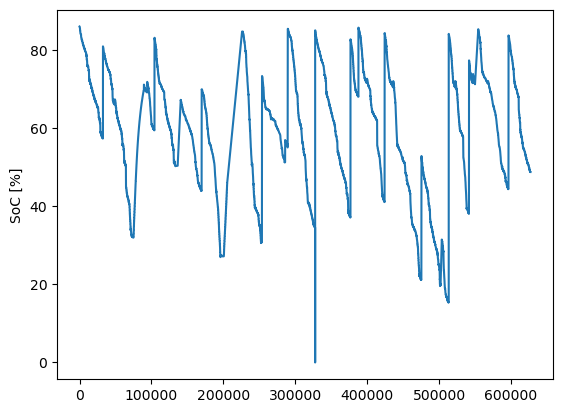

In [9]:
sns.lineplot(Trip_B['SoC [%]'])

In [10]:
Trip_B.fillna(Trip_B.mean(), inplace= True)

In [11]:
Trip_B.isnull().sum()

Time [s]                                  0
Velocity [km/h]                           0
Elevation [m]                             0
Throttle [%]                              0
Motor Torque [Nm]                         0
Longitudinal Acceleration [m/s^2]         0
Regenerative Braking Signal               0
Battery Voltage [V]                       0
Battery Current [A]                       0
Battery Temperature [°C]                  0
max. Battery Temperature [°C]             0
displayed SoC [%]                         0
min. SoC [%]                              0
max. SoC [%)                              0
Heating Power CAN [kW]                    0
Heating Power LIN [W]                     0
Requested Heating Power [W]               0
AirCon Power [kW]                         0
Heater Signal                             0
Heater Voltage [V]                        0
Heater Current [A]                        0
Ambient Temperature [°C]                  0
Ambient Temperature Sensor [°C] 

<Axes: ylabel='SoC [%]'>

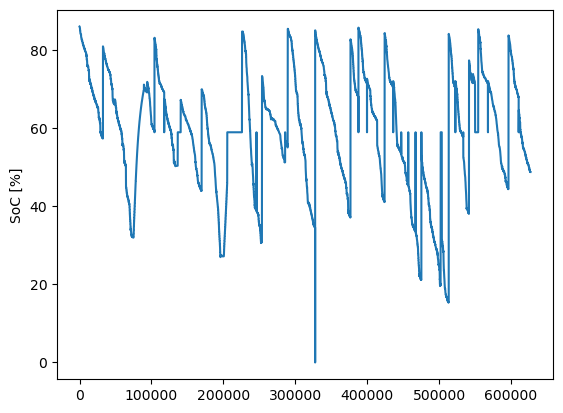

In [12]:
sns.lineplot(Trip_B['SoC [%]'])

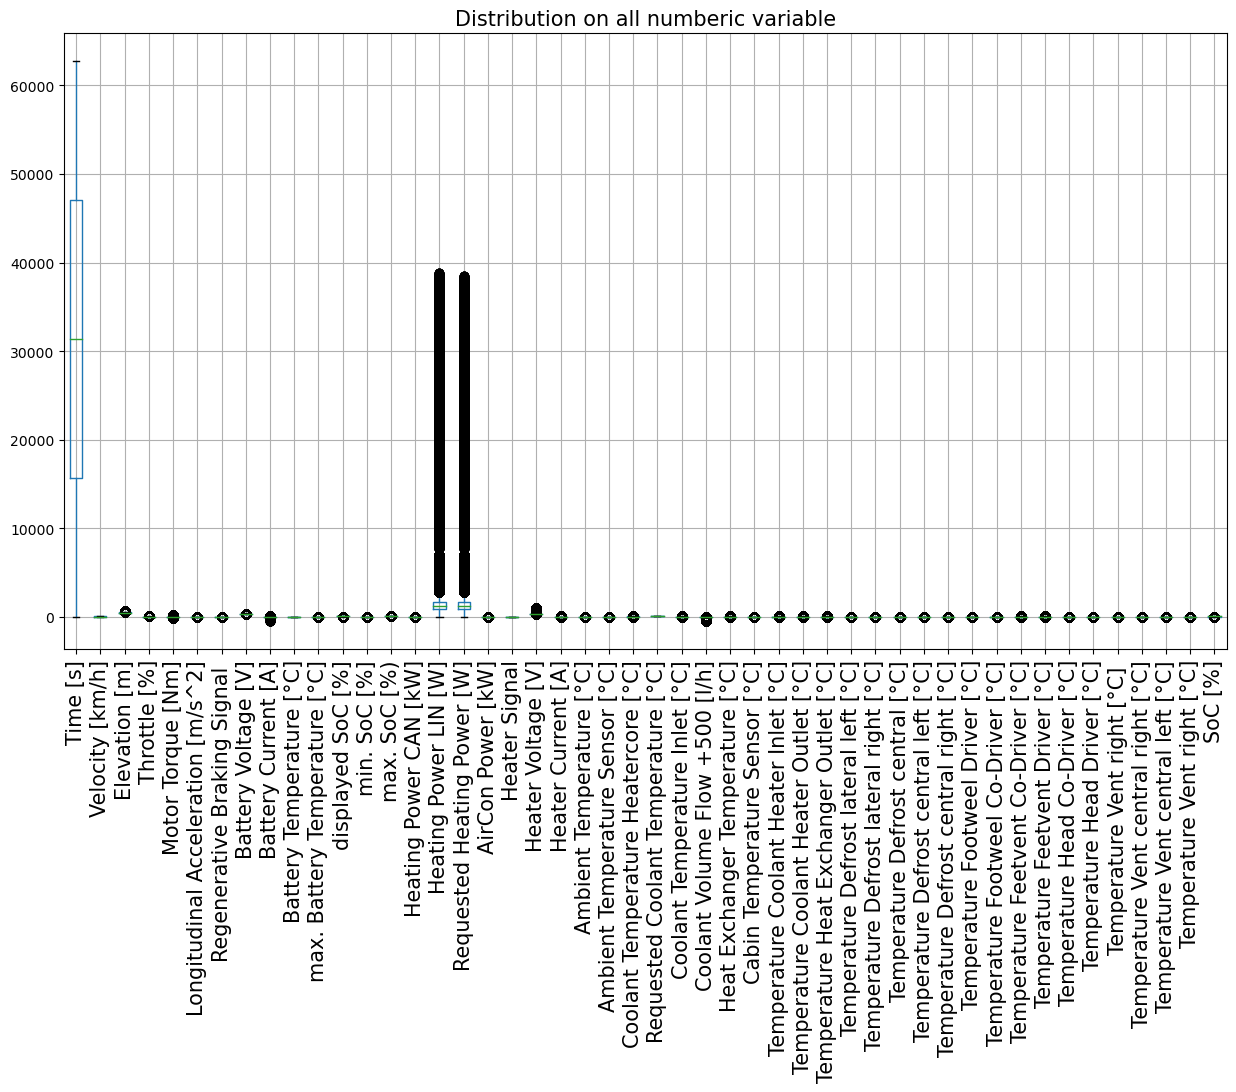

In [13]:
plt.figure(figsize= (15,8))
Trip_B.boxplot()
plt.title('Distribution on all numberic variable', fontsize = 15)
plt.xticks(rotation ='vertical', fontsize = 15)
plt.show()


In [14]:
Q1 = Trip_B.quantile(0.25)

Q3 = Trip_B.quantile(0.75)

IQR = Q3 - Q1

Trip_B = Trip_B [~((Trip_B < (Q1 - 1.5 * IQR)) | (Trip_B > (Q3 + 1.5 * IQR))).any(axis=1)]

Trip_B.shape

(240310, 48)

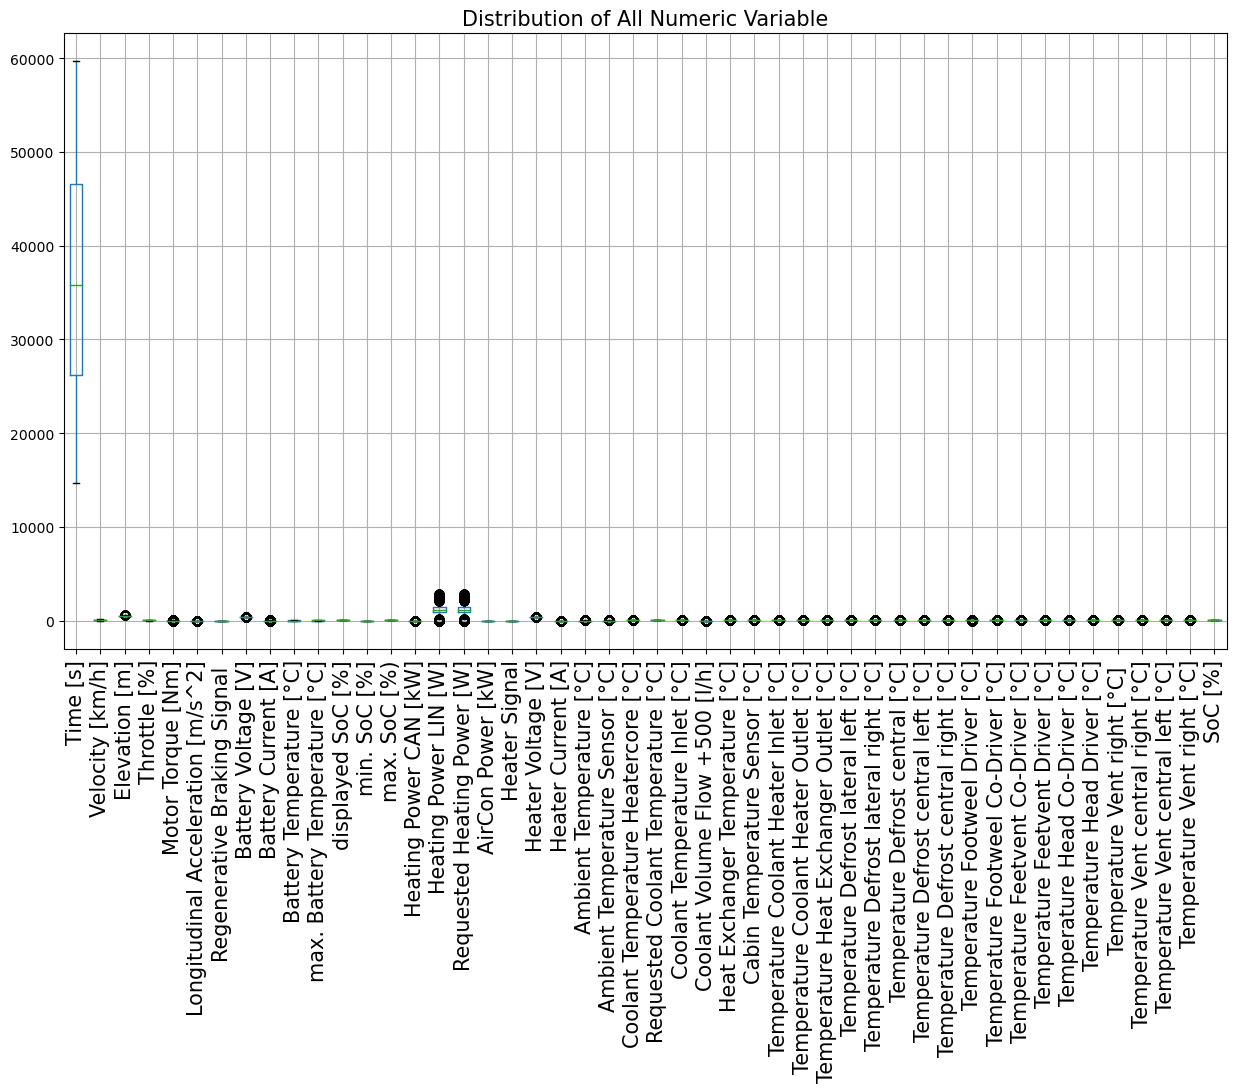

In [15]:
plt.figure(figsize = (15,8))

Trip_B.boxplot()

plt.title("Distribution of All Numeric Variable", fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

In [16]:
df_target = Trip_B['SoC [%]']

df_feature = Trip_B.drop('SoC [%]', axis= 1)

In [17]:
from sklearn.preprocessing import StandardScaler

X_Scaler = StandardScaler()


num_scaled = X_Scaler.fit_transform(df_feature)

df_num_scaled = pd.DataFrame(num_scaled, columns = df_feature.columns)

y = (df_target - df_target.mean()) / df_target.std()

In [18]:
X = df_num_scaled

X.head()

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  Motor Torque [Nm]  \
0 -1.654384        -1.477425      -0.091694     -1.611755          -0.580464   
1 -1.654376        -1.477425      -0.091694     -1.611755          -0.580464   
2 -1.654368        -1.477425      -0.091694     -1.611755          -0.580464   
3 -1.654361        -1.477425      -0.091694     -1.611755          -0.580464   
4 -1.654353        -1.477425      -0.091694     -1.611755          -0.580464   

   Longitudinal Acceleration [m/s^2]  Regenerative Braking Signal   \
0                           0.289880                      0.000000   
1                           0.324422                      0.000000   
2                           0.186253                      0.000000   
3                           0.289880                      0.000000   
4                           0.289880                      0.000000   

   Battery Voltage [V]  Battery Current [A]  Battery Temperature [°C]  \
0             0.749467             0.696931                 -0.499575   
1             0.749467             0.687832                 -0.499575   
2             0.749467             0.683283                 -0.499575   
3             0.749467             0.696931                 -0.499575   
4             0.749467             0.706485                 -0.499575   

   max. Battery Temperature [°C]  displayed SoC [%]  min. SoC [%]  \
0                      -0.603951           0.372187      0.000000   
1                      -0.603951           0.372187      0.000000   
2                      -0.603951           0.372187      0.000000   
3                      -0.603951           0.372187      0.000000   
4                      -0.603951           0.372187      0.000000   

   max. SoC [%)  Heating Power CAN [kW]  Heating Power LIN [W]  \
0      0.000000               -1.075240              -1.186530   
1      0.000000               -1.075240              -1.186530   
2      0.000000               -1.075240              -1.186530   
3      0.000000               -1.075240              -1.186530   
4      0.000000               -1.075240              -1.186530   

   Requested Heating Power [W]  AirCon Power [kW]  Heater Signal  \
0                    -1.188817           0.000000       0.000000   
1                    -1.188817           0.000000       0.000000   
2                    -1.188817           0.000000       0.000000   
3                    -1.188817           0.000000       0.000000   
4                    -1.188817           0.000000       0.000000   

   Heater Voltage [V]  Heater Current [A]  Ambient Temperature [°C]  \
0            0.745356           -1.222978                  1.227283   
1            0.745356           -1.222978                  1.227283   
2            0.745356           -1.222978                  1.227283   
3            0.745356           -1.222978                  1.227283   
4            0.745356           -1.222978                  1.227283   

   Ambient Temperature Sensor [°C]  Coolant Temperature Heatercore [°C]  \
0                         1.420485                             1.219268   
1                         1.424219                             1.219268   
2                         1.427952                             1.219268   
3                         1.431686                             1.219268   
4                         1.435420                             1.219268   

   Requested Coolant Temperature [°C]  Coolant Temperature Inlet [°C]  \
0                            0.000000                        1.613128   
1                            0.000000                        1.613128   
2                            0.000000                        1.613128   
3                            0.000000                        1.613128   
4                            0.000000                        1.613128   

   Coolant Volume Flow +500 [l/h]  Heat Exchanger Temperature [°C]  \
0                        0.061289                     

In [19]:
y.head(5)

146695   0.545352
146696   0.545352
146697   0.545352
146698   0.545352
146699   0.545352
Name: SoC [%], dtype: float64

In [20]:
X.shape

(240310, 47)

In [21]:
y.shape

(240310,)

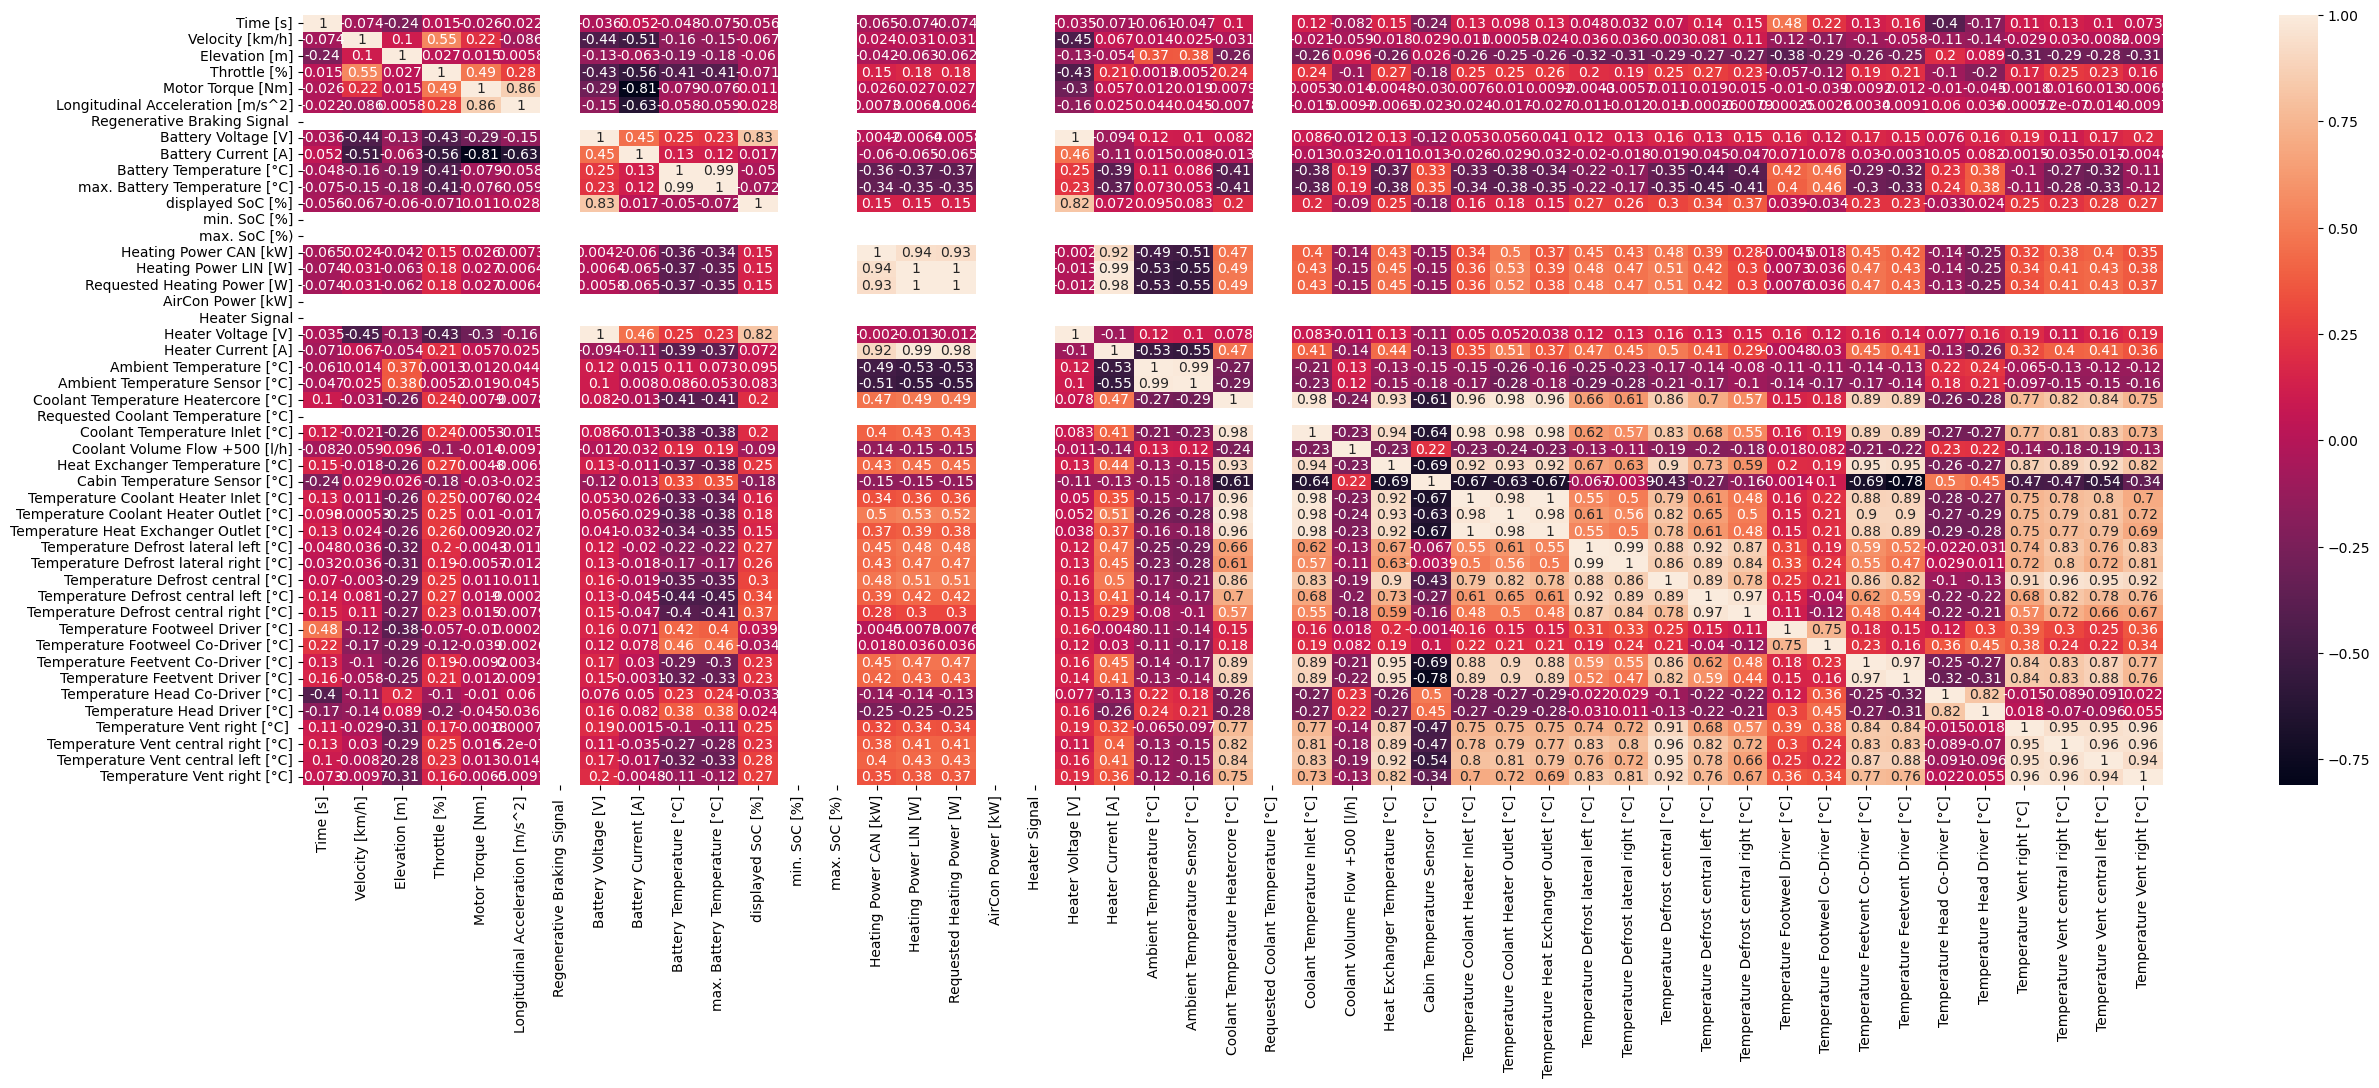

In [22]:
plt.figure(figsize = (30,10))

sns.heatmap(X.corr(), annot = True, annot_kws = {"size":10})

plt.yticks(rotation = 'horizontal', fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

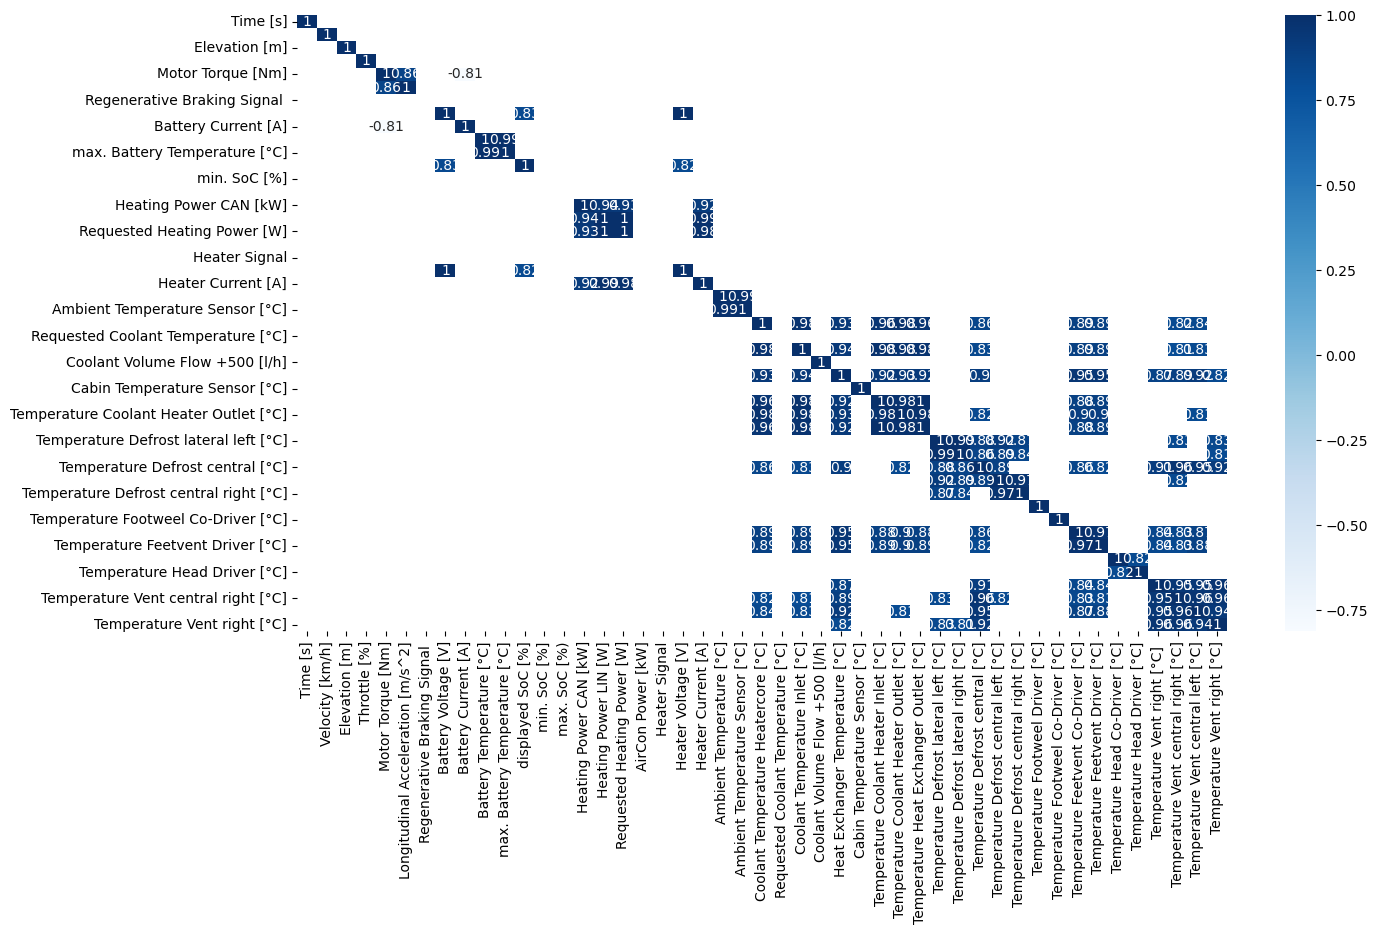

In [23]:
plt.figure(figsize = (15,8))

sns.heatmap(X.corr()[np.abs(X.corr()) > 0.8], annot = True, annot_kws= {'size': 10}, cmap = 'Blues')

plt.yticks(rotation ="horizontal", fontsize = 10)
plt.xticks(fontsize = 10)

plt.show()

In [24]:
df_num = X.select_dtypes(include=[np.number])

df_num.head()

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  Motor Torque [Nm]  \
0 -1.654384        -1.477425      -0.091694     -1.611755          -0.580464   
1 -1.654376        -1.477425      -0.091694     -1.611755          -0.580464   
2 -1.654368        -1.477425      -0.091694     -1.611755          -0.580464   
3 -1.654361        -1.477425      -0.091694     -1.611755          -0.580464   
4 -1.654353        -1.477425      -0.091694     -1.611755          -0.580464   

   Longitudinal Acceleration [m/s^2]  Regenerative Braking Signal   \
0                           0.289880                      0.000000   
1                           0.324422                      0.000000   
2                           0.186253                      0.000000   
3                           0.289880                      0.000000   
4                           0.289880                      0.000000   

   Battery Voltage [V]  Battery Current [A]  Battery Temperature [°C]  \
0             0.749467             0.696931                 -0.499575   
1             0.749467             0.687832                 -0.499575   
2             0.749467             0.683283                 -0.499575   
3             0.749467             0.696931                 -0.499575   
4             0.749467             0.706485                 -0.499575   

   max. Battery Temperature [°C]  displayed SoC [%]  min. SoC [%]  \
0                      -0.603951           0.372187      0.000000   
1                      -0.603951           0.372187      0.000000   
2                      -0.603951           0.372187      0.000000   
3                      -0.603951           0.372187      0.000000   
4                      -0.603951           0.372187      0.000000   

   max. SoC [%)  Heating Power CAN [kW]  Heating Power LIN [W]  \
0      0.000000               -1.075240              -1.186530   
1      0.000000               -1.075240              -1.186530   
2      0.000000               -1.075240              -1.186530   
3      0.000000               -1.075240              -1.186530   
4      0.000000               -1.075240              -1.186530   

   Requested Heating Power [W]  AirCon Power [kW]  Heater Signal  \
0                    -1.188817           0.000000       0.000000   
1                    -1.188817           0.000000       0.000000   
2                    -1.188817           0.000000       0.000000   
3                    -1.188817           0.000000       0.000000   
4                    -1.188817           0.000000       0.000000   

   Heater Voltage [V]  Heater Current [A]  Ambient Temperature [°C]  \
0            0.745356           -1.222978                  1.227283   
1            0.745356           -1.222978                  1.227283   
2            0.745356           -1.222978                  1.227283   
3            0.745356           -1.222978                  1.227283   
4            0.745356           -1.222978                  1.227283   

   Ambient Temperature Sensor [°C]  Coolant Temperature Heatercore [°C]  \
0                         1.420485                             1.219268   
1                         1.424219                             1.219268   
2                         1.427952                             1.219268   
3                         1.431686                             1.219268   
4                         1.435420                             1.219268   

   Requested Coolant Temperature [°C]  Coolant Temperature Inlet [°C]  \
0                            0.000000                        1.613128   
1                            0.000000                        1.613128   
2                            0.000000                        1.613128   
3                            0.000000                        1.613128   
4                            0.000000                        1.613128   

   Coolant Volume Flow +500 [l/h]  Heat Exchanger Temperature [°C]  \
0                        0.061289                     

In [25]:
df_num.shape

(240310, 47)

In [26]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

# create a column of variable names
vif["Features"] = df_num.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

VIF_Factor                                Features
0   910.622989                     Battery Voltage [V]
1   878.697754                      Heater Voltage [V]
2   580.463584  Temperature Heat Exchanger Outlet [°C]
3   471.681184  Temperature Coolant Heater Outlet [°C]
4   424.509756   Temperature Coolant Heater Inlet [°C]
5   285.845339                   Heating Power LIN [W]
6   229.463395   Temperature Defrost lateral left [°C]
7   214.516238   Temperature Defrost central left [°C]
8   197.818728             Requested Heating Power [W]
9   169.684385  Temperature Defrost lateral right [°C]
10  148.337428                Battery Temperature [°C]
11  147.793417           max. Battery Temperature [°C]
12  117.295703        Temperature Defrost central [°C]
13   89.846699  Temperature Defrost central right [°C]
14   65.664628         Ambient Temperature Sensor [°C]
15   64.895662     Coolant Temperature Heatercore [°C]
16   62.463226                Ambient Temperature [°C]
17   61.700422                      Heater Current [A]
18   58.471181            Temperature Vent right [°C] 
19   53.758325          Coolant Temperature Inlet [°C]
20   51.986093        Temperature Feetvent Driver [°C]
21   51.752816      Temperature Vent central left [°C]
22   51.411924             Temperature Vent right [°C]
23   44.726030     Temperature Vent central right [°C]
24   43.831876         Heat Exchanger Temperature [°C]
25   36.941150     Temperature Feetvent Co-Driver [°C]
26   24.555946                       displayed SoC [%]
27   11.958563           Cabin Temperature Sensor [°C]
28    9.305117                  Heating Power CAN [kW]
29    8.536059                     Battery Current [A]
30    8.332505                       Motor Torque [Nm]
31    6.532945         Temperature Head Co-Driver [°C]
32    6.126363     Temperature Footweel Co-Driver [°C]
33    6.018856       Longitudinal Acceleration [m/s^2]
34    5.523354        Temperature Footweel Driver [°C]
35    4.860559            Temperature Head Driver [°C]
36    3.891853                         Velocity [km/h]
37    3.164052                                Time [s]
38    2.740260                            Throttle [%]
39    2.064006                           Elevation [m]
40    1.124309          Coolant Volume Flow +500 [l/h]
41         NaN            Regenerative Braking Signal 
42         NaN                            min. SoC [%]
43         NaN                            max. SoC [%)
44         NaN                       AirCon Power [kW]
45         NaN                           Heater Signal
46         NaN      Requested Coolant Temperature [°C]

In [27]:
df_num.columns

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Regenerative Braking Signal ', 'Battery Voltage [V]',
       'Battery Current [A]', 'Battery Temperature [°C]',
       'max. Battery Temperature [°C]', 'displayed SoC [%]', 'min. SoC [%]',
       'max. SoC [%)', 'Heating Power CAN [kW]', 'Heating Power LIN [W]',
       'Requested Heating Power [W]', 'AirCon Power [kW]', 'Heater Signal',
       'Heater Voltage [V]', 'Heater Current [A]', 'Ambient Temperature [°C]',
       'Ambient Temperature Sensor [°C]',
       'Coolant Temperature Heatercore [°C]',
       'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]',
       'Coolant Volume Flow +500 [l/h]', 'Heat Exchanger Temperature [°C]',
       'Cabin Temperature Sensor [°C]',
       'Temperature Coolant Heater Inlet [°C]',
       'Temperature Coolant Heater Outlet [°C]',
       'Temperature Heat Exchanger Outlet [°C]',
       'T

In [28]:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state= 10, test_size= 0.2)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (192248, 47)
X_test (48062, 47)
y_train (192248,)
y_test (48062,)


In [29]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

MLR_train = sm.OLS(y_train, X_train).fit()
print(MLR_train.summary())

                                 OLS Regression Results                                
Dep. Variable:                SoC [%]   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.923e+06
Date:                Tue, 16 Jan 2024   Prob (F-statistic):                        0.00
Time:                        21:24:26   Log-Likelihood:                      3.0572e+05
No. Observations:              192248   AIC:                                 -6.114e+05
Df Residuals:                  192207   BIC:                                 -6.109e+05
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [30]:
df_num = df_num.drop('Regenerative Braking Signal ', axis =1);

df_num = df_num.drop('max. SoC [%)', axis =1);

df_num = df_num.drop('AirCon Power [kW]', axis =1);

df_num = df_num.drop('Heater Signal', axis =1);

df_num = df_num.drop('Requested Coolant Temperature [°C]', axis =1);

df_num = df_num.drop('min. SoC [%]', axis =1)

In [31]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

# create a column of variable names
vif["Features"] = df_num.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

VIF_Factor                                Features
0   910.622989                     Battery Voltage [V]
1   878.697754                      Heater Voltage [V]
2   580.463584  Temperature Heat Exchanger Outlet [°C]
3   471.681184  Temperature Coolant Heater Outlet [°C]
4   424.509756   Temperature Coolant Heater Inlet [°C]
5   285.845339                   Heating Power LIN [W]
6   229.463395   Temperature Defrost lateral left [°C]
7   214.516238   Temperature Defrost central left [°C]
8   197.818728             Requested Heating Power [W]
9   169.684385  Temperature Defrost lateral right [°C]
10  148.337428                Battery Temperature [°C]
11  147.793417           max. Battery Temperature [°C]
12  117.295703        Temperature Defrost central [°C]
13   89.846699  Temperature Defrost central right [°C]
14   65.664628         Ambient Temperature Sensor [°C]
15   64.895662     Coolant Temperature Heatercore [°C]
16   62.463226                Ambient Temperature [°C]
17   61.700422                      Heater Current [A]
18   58.471181            Temperature Vent right [°C] 
19   53.758325          Coolant Temperature Inlet [°C]
20   51.986093        Temperature Feetvent Driver [°C]
21   51.752816      Temperature Vent central left [°C]
22   51.411924             Temperature Vent right [°C]
23   44.726030     Temperature Vent central right [°C]
24   43.831876         Heat Exchanger Temperature [°C]
25   36.941150     Temperature Feetvent Co-Driver [°C]
26   24.555946                       displayed SoC [%]
27   11.958563           Cabin Temperature Sensor [°C]
28    9.305117                  Heating Power CAN [kW]
29    8.536059                     Battery Current [A]
30    8.332505                       Motor Torque [Nm]
31    6.532945         Temperature Head Co-Driver [°C]
32    6.126363     Temperature Footweel Co-Driver [°C]
33    6.018856       Longitudinal Acceleration [m/s^2]
34    5.523354        Temperature Footweel Driver [°C]
35    4.860559            Temperature Head Driver [°C]
36    3.891853                         Velocity [km/h]
37    3.164052                                Time [s]
38    2.740260                            Throttle [%]
39    2.064006                           Elevation [m]
40    1.124309          Coolant Volume Flow +500 [l/h]

In [32]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_num.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

    # create a column of variable names
    vif["Features"] = df_num.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_num = df_num.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                                Features
0     2.504728                                Time [s]
1     2.673488                         Velocity [km/h]
2     1.723005                           Elevation [m]
3     2.483297                            Throttle [%]
4     8.192972                       Motor Torque [Nm]
5     5.936116       Longitudinal Acceleration [m/s^2]
6     4.599474                     Battery Current [A]
7     3.600575                Battery Temperature [°C]
8     1.461052                       displayed SoC [%]
9     6.630709                  Heating Power CAN [kW]
10    7.371837                      Heater Current [A]
11    2.725244                Ambient Temperature [°C]
12    6.124554          Coolant Temperature Inlet [°C]
13    1.119113          Coolant Volume Flow +500 [l/h]
14    5.810224           Cabin Temperature Sensor [°C]
15    6.233827  Temperature Defrost central right [°C]
16    4.175909        Temperature Footweel Driver [°C]
17    4.81

In [33]:
X = df_num

In [34]:
X.columns

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Battery Current [A]', 'Battery Temperature [°C]', 'displayed SoC [%]',
       'Heating Power CAN [kW]', 'Heater Current [A]',
       'Ambient Temperature [°C]', 'Coolant Temperature Inlet [°C]',
       'Coolant Volume Flow +500 [l/h]', 'Cabin Temperature Sensor [°C]',
       'Temperature Defrost central right [°C]',
       'Temperature Footweel Driver [°C]',
       'Temperature Footweel Co-Driver [°C]',
       'Temperature Head Co-Driver [°C]', 'Temperature Head Driver [°C]',
       'Temperature Vent right [°C]'],
      dtype='object')

In [35]:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state= 10, test_size= 0.2)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (192248, 21)
X_test (48062, 21)
y_train (192248,)
y_test (48062,)


In [36]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

MLR_train = sm.OLS(y_train, X_train).fit()
print(MLR_train.summary())

                                 OLS Regression Results                                
Dep. Variable:                SoC [%]   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          3.366e+06
Date:                Tue, 16 Jan 2024   Prob (F-statistic):                        0.00
Time:                        21:32:53   Log-Likelihood:                      2.9526e+05
No. Observations:              192248   AIC:                                 -5.905e+05
Df Residuals:                  192227   BIC:                                 -5.903e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [37]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

# check the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (192248, 21)
y_train (192248,)
X_test (48062, 21)
y_test (48062,)


In [38]:
print(y_train.isnull().sum())
print(X_train.isnull().sum())

0
Time [s]                                  0
Velocity [km/h]                           0
Elevation [m]                             0
Throttle [%]                              0
Motor Torque [Nm]                         0
Longitudinal Acceleration [m/s^2]         0
Battery Current [A]                       0
Battery Temperature [°C]                  0
displayed SoC [%]                         0
Heating Power CAN [kW]                    0
Heater Current [A]                        0
Ambient Temperature [°C]                  0
Coolant Temperature Inlet [°C]            0
Coolant Volume Flow +500 [l/h]            0
Cabin Temperature Sensor [°C]             0
Temperature Defrost central right [°C]    0
Temperature Footweel Driver [°C]          0
Temperature Footweel Co-Driver [°C]       0
Temperature Head Co-Driver [°C]           0
Temperature Head Driver [°C]              0
Temperature Vent right [°C]               0
dtype: int64


In [39]:
y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)

In [40]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                SoC [%]   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          3.357e+06
Date:                Tue, 16 Jan 2024   Prob (F-statistic):                        0.00
Time:                        21:32:54   Log-Likelihood:                      2.9490e+05
No. Observations:              192248   AIC:                                 -5.898e+05
Df Residuals:                  192227   BIC:                                 -5.895e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

Skewness of the residuals:  -0.5272016090897511


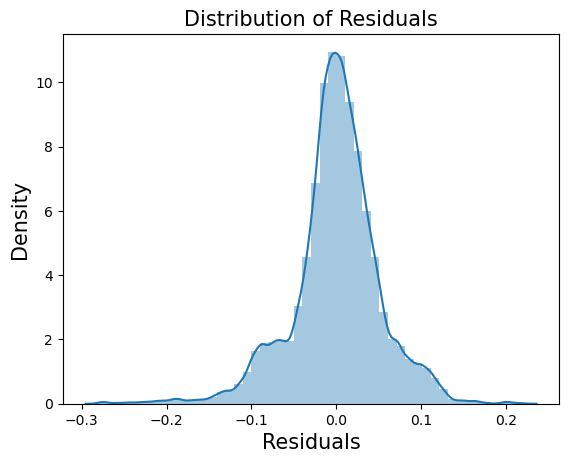

In [41]:
# plot a distplot for the residuals
sns.distplot(MLR_model.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model.resid.skew())

In [42]:
y_pred = MLR_train.predict(X_test)

In [43]:
y_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

prediction = pd.DataFrame()

prediction["Test_variable"] = y_test

prediction["Predicted"] = y_pred

prediction.head(10)

Test_variable  Predicted
0      -0.855914  -0.861951
1       1.002908   0.988212
2       0.180737   0.166645
3      -0.784421  -0.831727
4      -0.026593  -0.035901
5       0.373768   0.416583
6      -0.798720  -0.780722
7      -0.276819  -0.277613
8       1.610600   1.676728
9      -0.012295  -0.000087

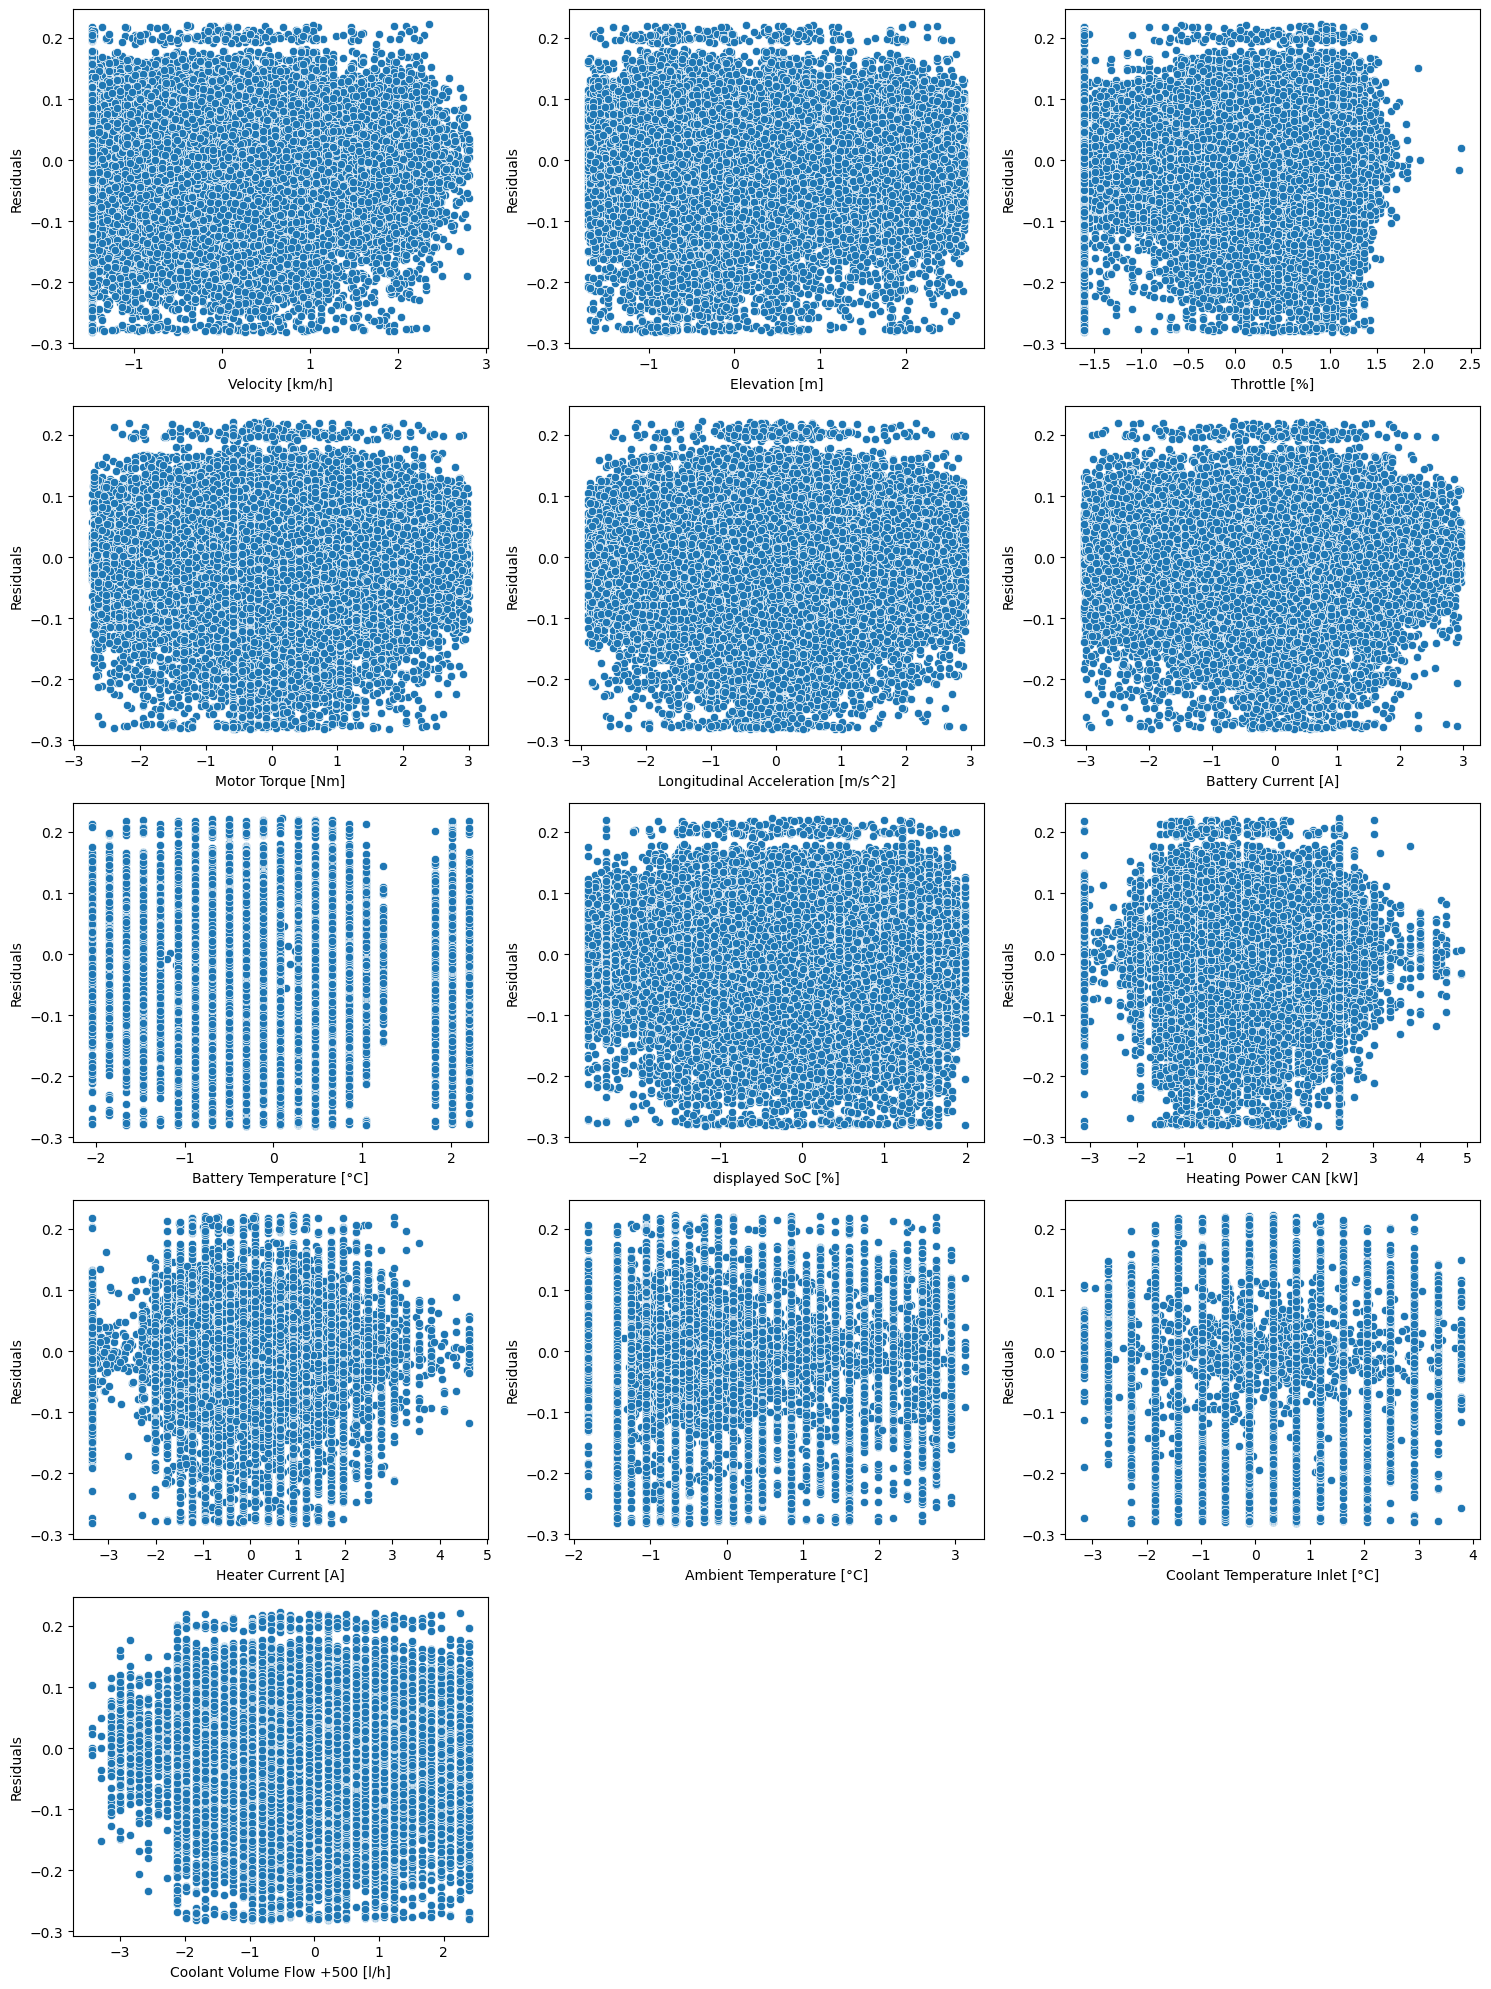

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming MLR_train.resid represents the residuals of the model 
# and X_train contains the predictor variables (excluding the intercept)

# Number of independent variables (excluding intercept)
num_variables = 13

# Set up the subplots
num_cols = 3  # Adjust the number of columns for subplot arrangement
num_rows = (num_variables - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Use a for loop to create scatter plots for residuals and each independent variable
for i, variable in enumerate(X_train.columns[1:num_variables + 1]):  # Exclude intercept
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=X_train[variable], y=MLR_train.resid, ax=axes[row, col])
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Residuals')

# Hide empty subplots if any
for i in range(num_variables, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [45]:
X_train_with_const = sm.add_constant(X_train)

# Fit your multiple linear regression model with the updated exogenous variables (including the constant term)
MLR_train_res = sm.OLS(y_train, X_train_with_const).fit()

print(MLR_train_res.summary())


                            OLS Regression Results                            
Dep. Variable:                SoC [%]   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.357e+06
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:33:03   Log-Likelihood:             2.9490e+05
No. Observations:              192248   AIC:                        -5.898e+05
Df Residuals:                  192226   BIC:                        -5.895e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [46]:
# Perform the Breusch-Pagan test with the residuals of the regression model
name = ['f-value', 'p-value']
test = sms.het_breuschpagan(MLR_train_res.resid, MLR_train_res.model.exog)

# Retrieve and print the test results
result = lzip(name, test[2:])
print(result)

[('f-value', 2636.1808399194147), ('p-value', 0.0)]


Text(0, 0.5, 'Sample Quantiles')

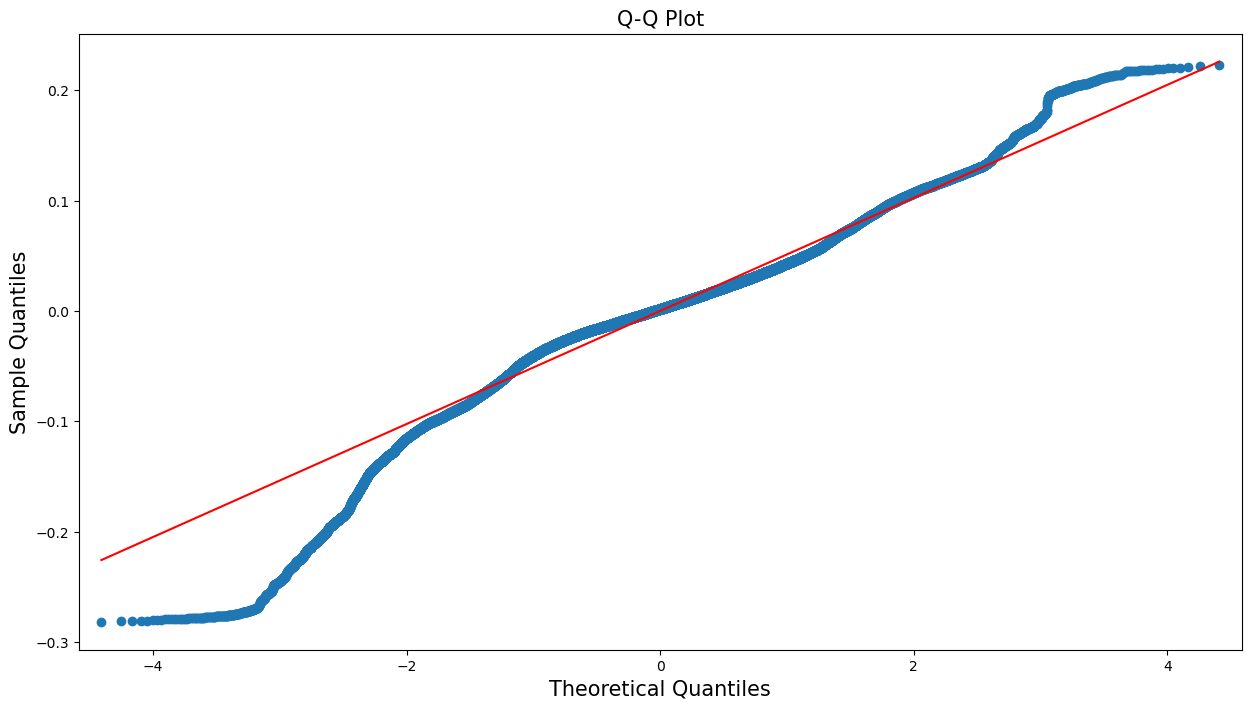

In [47]:
plt.rcParams['figure.figsize'] = [15,8]

qqplot(MLR_train_res.resid, line= 'r')

plt.title("Q-Q Plot", fontsize = 15)

plt.xlabel('Theoretical Quantiles', fontsize=15)
plt.ylabel('Sample Quantiles', fontsize=15)

In [48]:
stat, p_value = shapiro(MLR_train_res.resid)

print('Test Statistic:', stat)
print('P-Value:', p_value)

Test Statistic: 0.9636120796203613
P-Value: 0.0


In [49]:
train_pred = MLR_train.predict(X_train)

test_pred = MLR_train.predict(X_test)

In [50]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print ('Mean square Error on Training set:', mse_train)

mse_test = round(mean_absolute_error(y_test,test_pred),4)
print('Mean Square Error on Testing set:', mse_test)

Mean square Error on Training set: 0.0027
Mean Square Error on Testing set: 0.0372


In [51]:
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train),4)

print('Root Mean Square Error on training set:', rmse_train)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)

print("Root Mean Square error on test set:", rmse_test)

Root Mean Square Error on training set: 0.0522
Root Mean Square error on test set: 0.052


In [52]:
mae_train = round(mean_absolute_error(y_train, train_pred),4)

print("Mean absolute Error on training set:", mae_train)

mae_test = round(mean_absolute_error(y_test, test_pred),4)

print("Mean Absolute Error on test set:", mae_test)

Mean absolute Error on training set: 0.0374
Mean Absolute Error on test set: 0.0372


In [53]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [54]:
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  18.3077
Mean Absolute Percentage Error (MAPE) on test set:  318.4379


Skewness of the residuals:  -0.5255405993809306


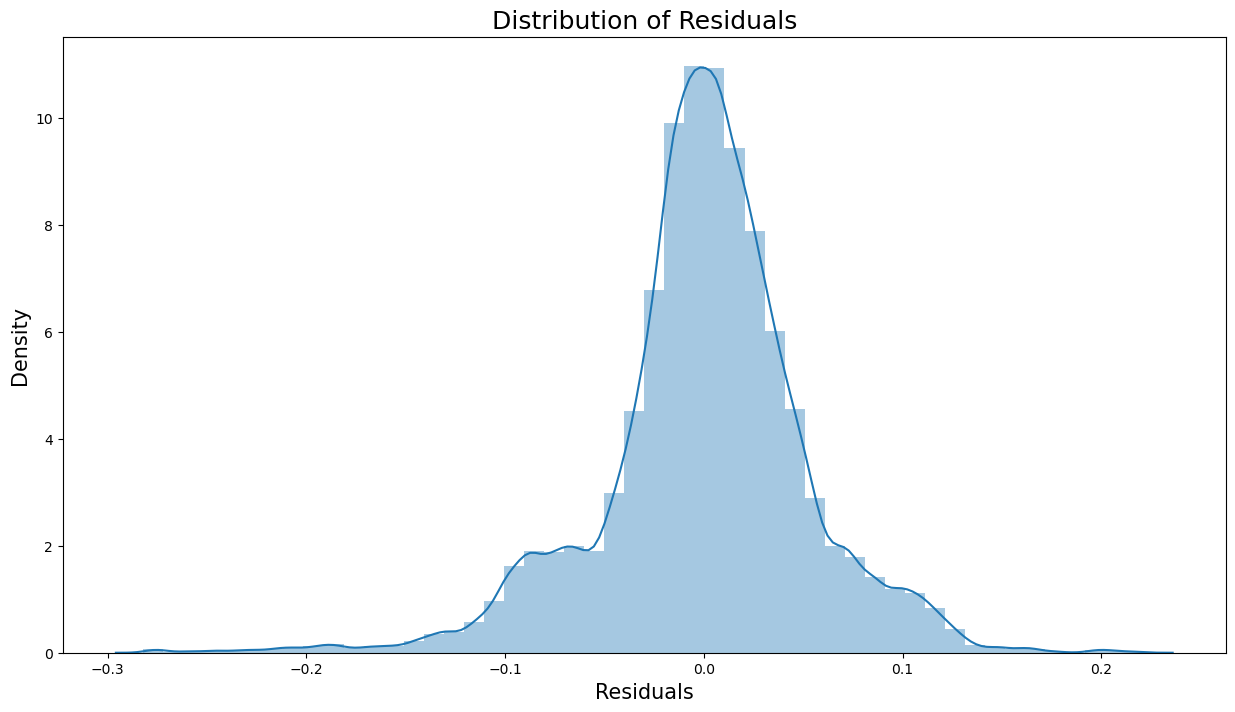

In [55]:
sns.distplot(MLR_train.resid)
plt.xlabel("Residuals", fontsize= 15)
plt.ylabel("Density", fontsize= 15)
plt.title("Distribution of Residuals", fontsize= 18)

print("Skewness of the residuals: ", MLR_train.resid.skew())

In [56]:
# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [57]:
X_train, X_test,y_train,y_test = train_test_split(X,y, random_state=20, test_size=0.2)

In [58]:
# Instantiate the LinearRegression class
linreg = LinearRegression()

# Use the instantiated linreg object in feature selection
linreg_forward = sfs(estimator=linreg, k_features=12, forward=True,
                     verbose=2, scoring='r2')

# Fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.2s finished

[2024-01-16 21:33:08] Features: 1/12 -- score: 0.9936831511161923[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.2s finished

[2024-01-16 21:33:10] Features: 2/12 -- score: 0.9955053635822558[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    2.3s finished

[2024-01-16 21:33:12] Features: 3/12 -- score: 0.9960227855006201[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [59]:
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Battery Temperature [°C]', 'displayed SoC [%]', 'Ambient Temperature [°C]', 'Cabin Temperature Sensor [°C]', 'Temperature Defrost central right [°C]', 'Temperature Footweel Co-Driver [°C]', 'Temperature Head Co-Driver [°C]', 'Temperature Head Driver [°C]', 'Temperature Vent right [°C]')

R-Squared:  0.9972341926112683


In [60]:
# Instantiate the LinearRegression class
linreg = LinearRegression()

# Use the instantiated linreg object in feature selection
linreg_forward = sfs(estimator=linreg, k_features='best', forward=True,
                     verbose=2, scoring='r2')

# Fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.1s finished

[2024-01-16 21:33:39] Features: 1/21 -- score: 0.9936831511161923[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.9s finished

[2024-01-16 21:33:41] Features: 2/21 -- score: 0.9955053635822558[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    2.1s finished

[2024-01-16 21:33:43] Features: 3/21 -- score: 0.9960227855006201[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [61]:
# printing the selected feature names when k_features = 'best'
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Battery Current [A]', 'Battery Temperature [°C]', 'displayed SoC [%]', 'Heating Power CAN [kW]', 'Heater Current [A]', 'Ambient Temperature [°C]', 'Coolant Temperature Inlet [°C]', 'Coolant Volume Flow +500 [l/h]', 'Cabin Temperature Sensor [°C]', 'Temperature Defrost central right [°C]', 'Temperature Footweel Driver [°C]', 'Temperature Footweel Co-Driver [°C]', 'Temperature Head Co-Driver [°C]', 'Temperature Head Driver [°C]', 'Temperature Vent right [°C]')

R-Squared:  0.9972757431848033


In [62]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step backward feature selection
# pass the regression model to 'estimator'
# pass number of required features to 'k_features'. 'best' means that a best possible subset will be selected 
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False,
                     verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    9.8s finished

[2024-01-16 21:34:34] Features: 20/1 -- score: 0.9972757074077373[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    9.1s finished

[2024-01-16 21:34:44] Features: 19/1 -- score: 0.9972756579969089[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    8.0s finished

[2024-01-16 21:34:52] Features: 18/1 -- score: 0.9972750933780647[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [63]:
# print the selected feature names when k_features = 'best'
print('Features selelected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
('Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Battery Current [A]', 'Battery Temperature [°C]', 'displayed SoC [%]', 'Heating Power CAN [kW]', 'Heater Current [A]', 'Ambient Temperature [°C]', 'Coolant Temperature Inlet [°C]', 'Coolant Volume Flow +500 [l/h]', 'Cabin Temperature Sensor [°C]', 'Temperature Defrost central right [°C]', 'Temperature Footweel Driver [°C]', 'Temperature Footweel Co-Driver [°C]', 'Temperature Head Co-Driver [°C]', 'Temperature Head Driver [°C]', 'Temperature Vent right [°C]')

R-Squared:  0.9972757431848033


In [64]:
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 21)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Battery Current [A]', 'Battery Temperature [°C]', 'displayed SoC [%]',
       'Heating Power CAN [kW]', 'Heater Current [A]',
       'Ambient Temperature [°C]', 'Coolant Temperature Inlet [°C]',
       'Coolant Volume Flow +500 [l/h]', 'Cabin Temperature Sensor [°C]',
       'Temperature Defrost central right [°C]',
       'Temperature Footweel Driver [°C]',
       'Temperature Footweel Co-Driver [°C]',
       'Temperature Head Co-Driver [°C]', 'Temperature Head Driver [°C]',
       'Temperature Vent right [°C]'],
      dtype='object')


In [65]:
# store the X_train with significant variables in new_X_train
new_X_train = X_train[['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Battery Current [A]', 'Battery Temperature [°C]', 'displayed SoC [%]',
       'Heating Power CAN [kW]', 'Heater Current [A]',
       'Ambient Temperature [°C]', 'Coolant Temperature Inlet [°C]',
       'Coolant Volume Flow +500 [l/h]', 'Cabin Temperature Sensor [°C]',
       'Temperature Defrost central right [°C]',
       'Temperature Footweel Driver [°C]',
       'Temperature Footweel Co-Driver [°C]',
       'Temperature Head Co-Driver [°C]', 'Temperature Head Driver [°C]',
       'Temperature Vent right [°C]']]

# initiate linear regression
linreg = LinearRegression()

# build the model using new_X_train and y_train
linreg.fit(new_X_train, y_train)

# check the score
linreg.score(new_X_train, y_train)

0.9972766483544194

In [66]:
kf = KFold(n_splits= 5)

def get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k,y_train_k)
    return model.score(X_test_k, y_test_k)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=20)

In [68]:
scores= []

for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
   
    # call the function 'get_scores()' and append the scores in the list 'scores'
    scores.append(get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k)) 
    
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.9972993681819601, 0.997303794435078, 0.997281635868885, 0.9972440140369372, 0.9972080760533808]

Minimum score obtained:  0.9972
Maximum score obtained:  0.9973
Average score obtained:  0.9973


In [69]:
# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing linear regression
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'r2' for r-squared, 'neg_mean_squared_error' for mean squared error (negative)
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

In [70]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.99729937 0.99730379 0.99728164 0.99724401 0.99720808]

Minimum score obtained:  0.9972
Maximum score obtained:  0.9973
Average score obtained:  0.9973


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [72]:
def get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                               # fit the model
    return model.score(X_test_k, y_test_k)     

In [73]:
X_train_k.head()

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  \
194405  0.979216        -0.029725      -0.810351      0.596588   
156456  0.498850         1.119987      -0.558979      1.196675   
158323  0.514334         0.806014      -0.149348      1.139360   
151520  0.372794        -1.477425      -0.062867     -1.611755   
43204  -0.970896         2.061905       0.311884      1.024731   

        Motor Torque [Nm]  Longitudinal Acceleration [m/s^2]  \
194405          -0.019483                           0.151711   
156456           1.289475                           0.358964   
158323           0.292174                          -0.055542   
151520          -0.580464                           0.255338   
43204            0.167511                          -0.159169   

        Battery Current [A]  Battery Temperature [°C]  displayed SoC [%]  \
194405             0.104134                 -0.885390          -1.647033   
156456            -2.027752                  0.272057           1.545518   
158323            -0.504587                  0.272057           1.327224   
151520             0.698751                  0.272057           0.454048   
43204             -0.988196                 -0.499575           0.563195   

        Heating Power CAN [kW]  Heater Current [A]  Ambient Temperature [°C]  \
194405               -0.102448            0.105666                 -1.057158   
156456                0.546080            0.371394                  1.227283   
158323                0.113728           -0.436421                  1.417653   
151520               -0.967152           -0.957250                  1.608023   
43204                -0.426712           -0.160063                 -1.057158   

        Coolant Temperature Inlet [°C]  Coolant Volume Flow +500 [l/h]  \
194405                       -0.552982                       -0.375796   
156456                        1.613128                        0.644069   
158323                       -0.119760                        0.206984   
151520                       -0.552982                        2.392408   
43204                        -0.552982                       -1.832746   

        Cabin Temperature Sensor [°C]  Temperature Defrost central right [°C]  \
194405                      -0.606216                               -0.370617   
156456                      -1.080273                                1.221138   
158323                       0.112054                                0.572073   
151520                      -0.002869                                0.059002   
43204                       -0.606216                               -0.478795   

        Temperature Footweel Driver [°C]  Temperature Footweel Co-Driver [°C]  \
194405                         -0.479064                            -1.445130   
156456                          1.178465                             1.584115   
158323                          0.534457                             0.989515   
151520                          0.259962                             1.126113   
43204                          -1.781157                            -1.260322   

        Temperature Head Co-Driver [°C]  Temperature Head Driver [°C]  \
194405                        -1.469626                     -1.280768   
156456                         0.925954                      0.728802   
158323                         0.191207                      0.259607   
151520                         1.392825                      1.817688   
43204                         -3.030963                     -2.068661   

        Temperature Vent right [°C]  
194405                    -1.156662  
156456                     1.727562  
158323                     0.159205  
151520                     0.542797  
43204                     -1.622799

In [74]:
y_train_k.head()

491982   -1.656638
429002    1.453315
431032    1.224537
412475    0.495307
236306    0.488157
Name: SoC [%], dtype: float64

In [75]:
# create an empty to store the MSE for each model
loocv_rmse = []

# instantiate the LOOCV method 
loocv = LeaveOneOut()

# use the for loop to build the regression model for each cross validation 
# use split() to split the dataset into two subsets; one with (n-1) data points and another with 1 data point
# where, n = total number of observations

for train_index, test_index in loocv.split(X_train):
    # create the train dataset, use iloc[] to retrieve the corresponding observations in train data
    # create the test dataset, use iloc[] to retrieve the corresponding observations in test data
    # # use '\' for stacking the code 
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    
    # instantiate the regression model
    linreg = LinearRegression()
    
    # fit the model on training dataset
    linreg.fit(X_train_l, y_train_l)
    
    # calculate MSE using test dataset
    # use predict() to predict the values of target variable
    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    
    # calculate the RMSE
    rmse = np.sqrt(mse)
    
    # use append() to add each RMSE to the list 'loocv_rmse'
    loocv_rmse.append(rmse)

In [76]:
# print the minimum rmse from the list
# use 'round()' to round-off the minimum rmse upto 4 digits
# min() returns minimum rmse 
print("\nMinimum rmse obtained: ", round(min(loocv_rmse), 4))

# print the maximum rmse from the list
# use 'round()' to round-off the maximum rmse upto 4 digits
# max() returns maximum rmse 
print("Maximum rmse obtained: ", round(max(loocv_rmse), 4))

# print the average rmse from the list
# use 'round()' to round-off the average rmse upto 4 digits
# np.mean() returns average rmse 
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))


Minimum rmse obtained:  0.0
Maximum rmse obtained:  0.2821
Average rmse obtained:  0.0373


In [77]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [78]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [79]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)
    
    # calculate the mape using the "mape()" function created above
    # calculate the MAPE for the test data
    mape_test = mape(y_test, test_pred)

    # return the MAPE for the test set
    return(mape_test)

In [80]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(X_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

In [81]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [82]:
# define a function to plot a barplot
# pass the model 
def plot_coefficients(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

In [83]:
linreg = LinearRegression()

MLR_Model = linreg.fit(X_train, y_train)

MLR_Model.score(X_train,y_train)

0.9972877818475645

In [84]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(MLR_Model))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(MLR_Model))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(MLR_Model) - get_train_rmse(MLR_Model))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.0521
RMSE on test set:  0.0524
Difference between RMSE on train and test set:  0.00030000000000000165


In [85]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

# create a function to update the score card for comparison of the scores from different algorithms
# pass the model name, model build, alpha, and l1_ratio as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, alpha='-', l1_ratio='-'):
    
    # use the global keyword to modify the existing variable
    global score_card

    # add a new row to the dataframe 'score_card'
    score_card.loc[len(score_card)] = {
        'Model_Name': algorithm_name,
        'Alpha (Wherever Required)': alpha,
        'l1-ratio': l1_ratio,
        'Test_MAPE': get_test_mape(model),
        'Test_RMSE': get_test_rmse(model),
        'R-Squared': get_score(model)[0],
        'Adj. R-Squared': get_score(model)[1]
    }

# update the dataframe 'score_card'
update_score_card(algorithm_name='Linear Regression', model=MLR_Model)

# print the dataframe
score_card


Model_Name Alpha (Wherever Required) l1-ratio  R-Squared  \
0  Linear Regression                         -        -   0.997288   

   Adj. R-Squared  Test_RMSE  Test_MAPE  
0        0.997287   0.052400  19.925822

In [86]:
# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

In [87]:
sgd = SGDRegressor(random_state=10)

linreg_sgd = sgd.fit(X_train, y_train)

print ("RMSE on train set:", get_train_rmse(linreg_sgd))

print("RMSE on test set:", get_test_rmse(linreg_sgd))

RMSE on train set: 0.0522
RMSE on test set: 0.0525


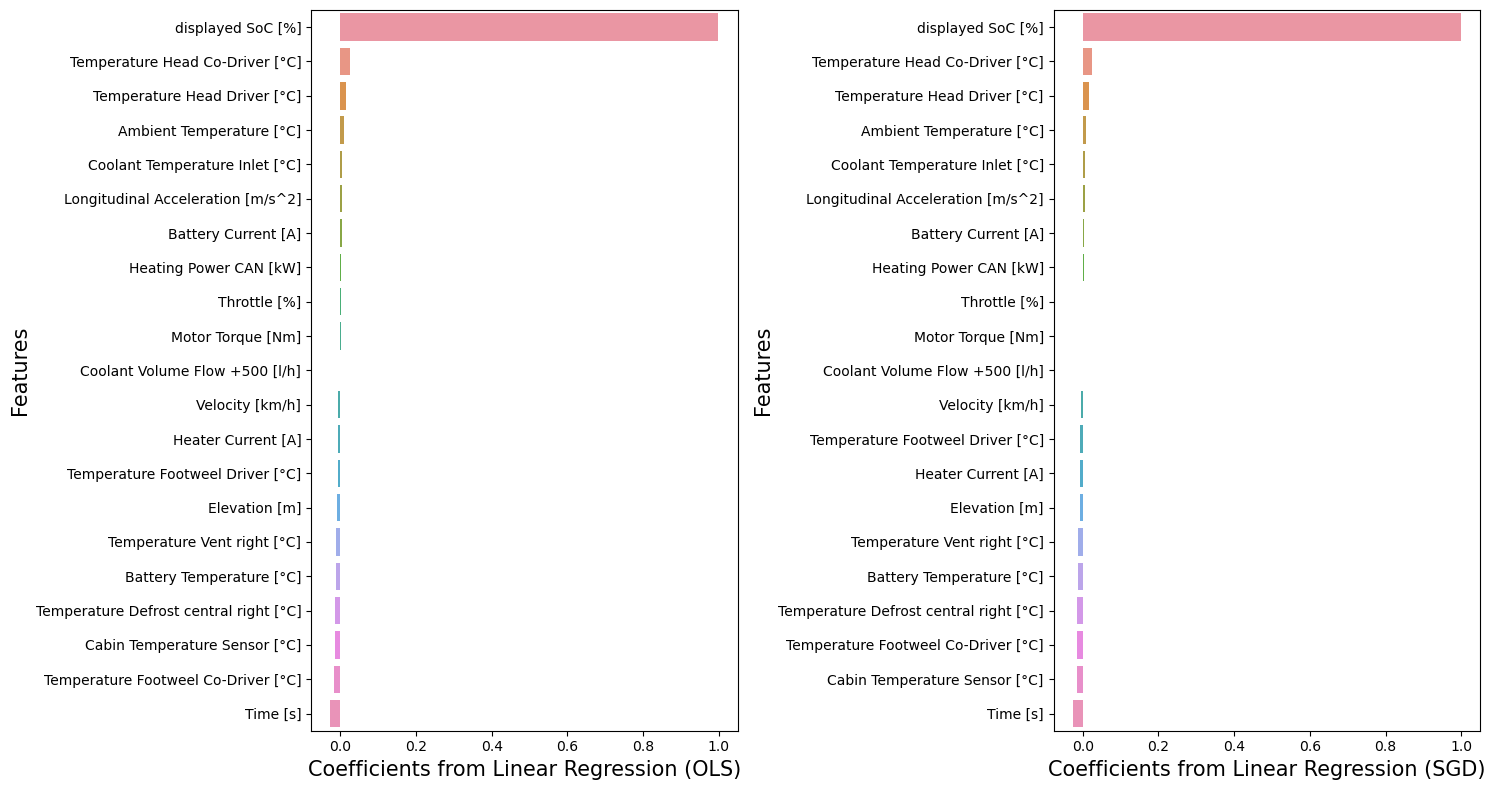

In [88]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_Model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(linreg_sgd, 'Linear Regression (SGD)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [89]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_sgd)

# print the dataframe
score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0              Linear Regression                         -        -   
1  Linear Regression (using SGD)                         -        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.997288        0.997287   0.052400  19.925822  
1   0.997277        0.997277   0.052500  20.174669

In [90]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.0524


In [91]:
#train_pred = ridge.predict(X_train)
#test_pred = ridge.predict(X_test)

In [92]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

# print the dataframe
score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0                  Linear Regression                         -        -   
1      Linear Regression (using SGD)                         -        -   
2  Ridge Regression (with alpha = 1)                         1        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.997288        0.997287   0.052400  19.925822  
1   0.997277        0.997277   0.052500  20.174669  
2   0.997288        0.997287   0.052400  19.925425

In [93]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.0524


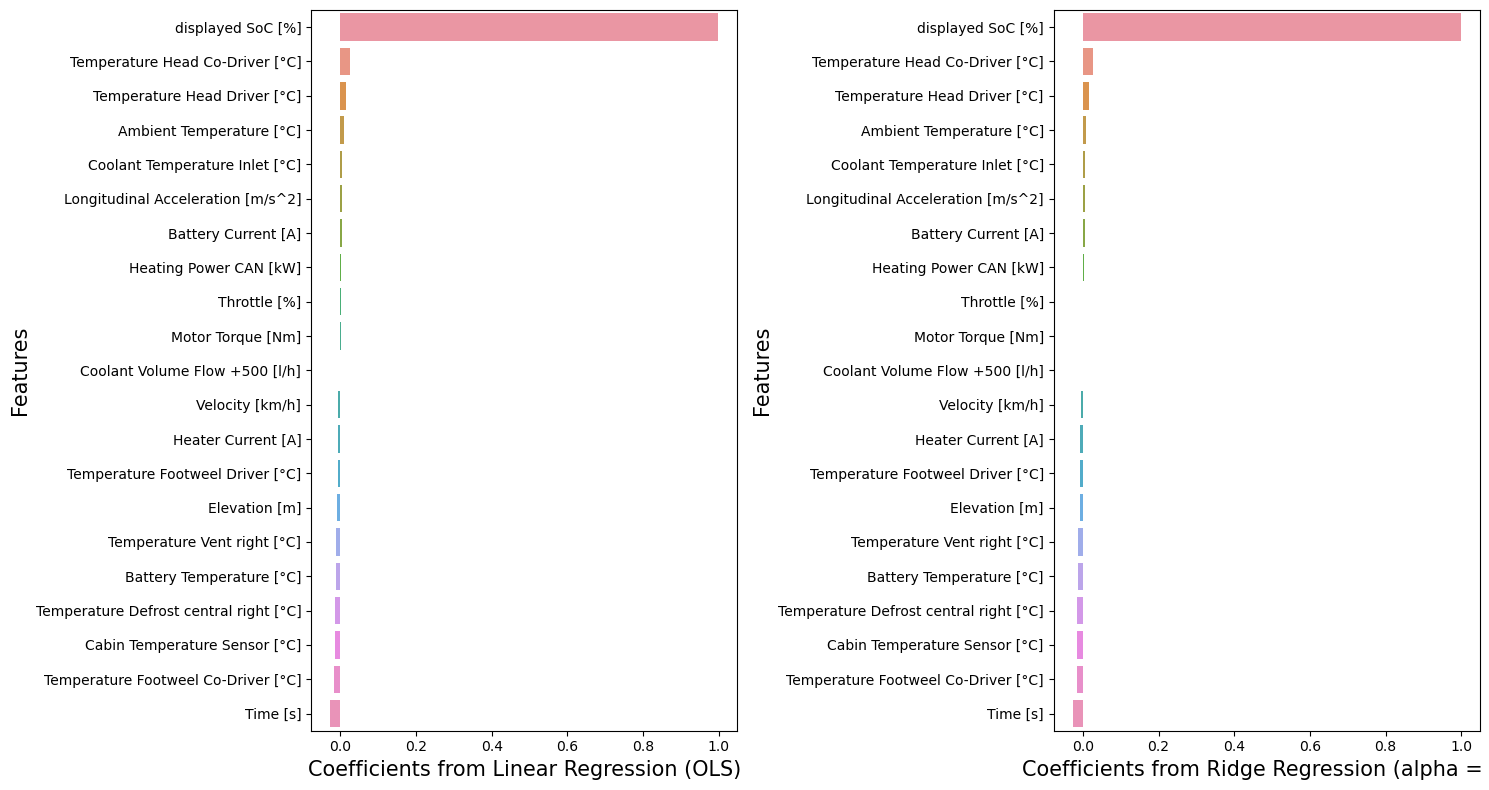

In [94]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_Model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(ridge, 'Ridge Regression (alpha = 2)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [95]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Ridge Regression (with alpha = 2)', model = ridge, alpha = '2')

# print the datarframe
score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0                  Linear Regression                         -        -   
1      Linear Regression (using SGD)                         -        -   
2  Ridge Regression (with alpha = 1)                         1        -   
3  Ridge Regression (with alpha = 2)                         2        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.997288        0.997287   0.052400  19.925822  
1   0.997277        0.997277   0.052500  20.174669  
2   0.997288        0.997287   0.052400  19.925425  
3   0.997288        0.997287   0.052400  19.925028

In [96]:
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
lasso.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 0.0615


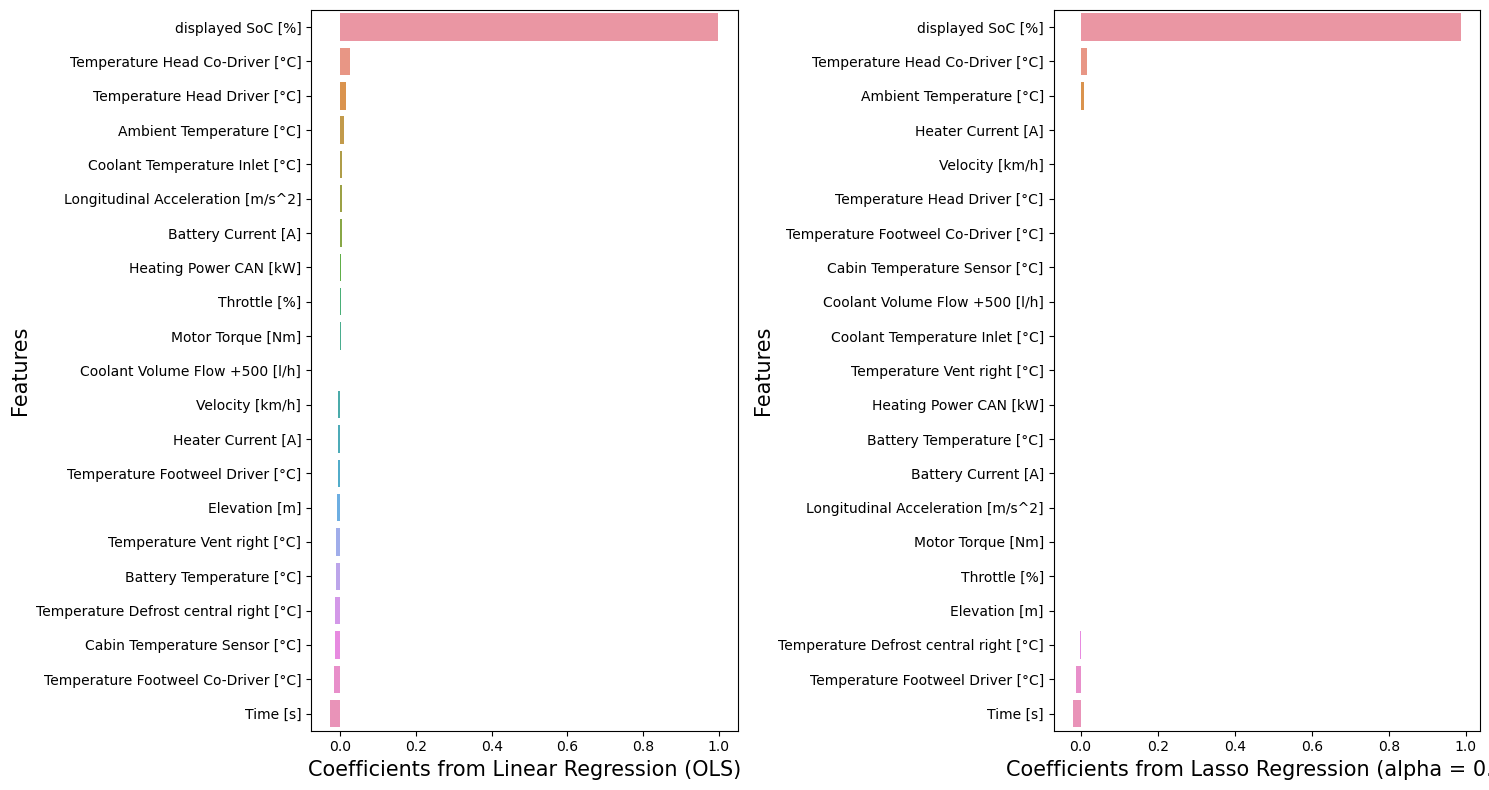

In [97]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_Model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.01)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [98]:
# create a dataframe to store the variable names and their corresponding coefficient values.
df_lasso_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso.coef_})

# print the variables having the coefficient value equal to zero
# 'to_list()' converts the output to the list type
print('Insignificant variables obtained from Lasso Regression when alpha is 0.01')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.01


['Velocity [km/h]',
 'Elevation [m]',
 'Throttle [%]',
 'Motor Torque [Nm]',
 'Longitudinal Acceleration [m/s^2]',
 'Battery Current [A]',
 'Battery Temperature [°C]',
 'Heating Power CAN [kW]',
 'Heater Current [A]',
 'Coolant Temperature Inlet [°C]',
 'Coolant Volume Flow +500 [l/h]',
 'Cabin Temperature Sensor [°C]',
 'Temperature Footweel Co-Driver [°C]',
 'Temperature Head Driver [°C]',
 'Temperature Vent right [°C]']

In [99]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')

# print the datarframe
score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0                  Linear Regression                         -        -   
1      Linear Regression (using SGD)                         -        -   
2  Ridge Regression (with alpha = 1)                         1        -   
3  Ridge Regression (with alpha = 2)                         2        -   
4                   Lasso Regression                      0.01        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.997288        0.997287   0.052400  19.925822  
1   0.997277        0.997277   0.052500  20.174669  
2   0.997288        0.997287   0.052400  19.925425  
3   0.997288        0.997287   0.052400  19.925028  
4   0.996290        0.996289   0.061500  25.221804

In [100]:
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 0.1109


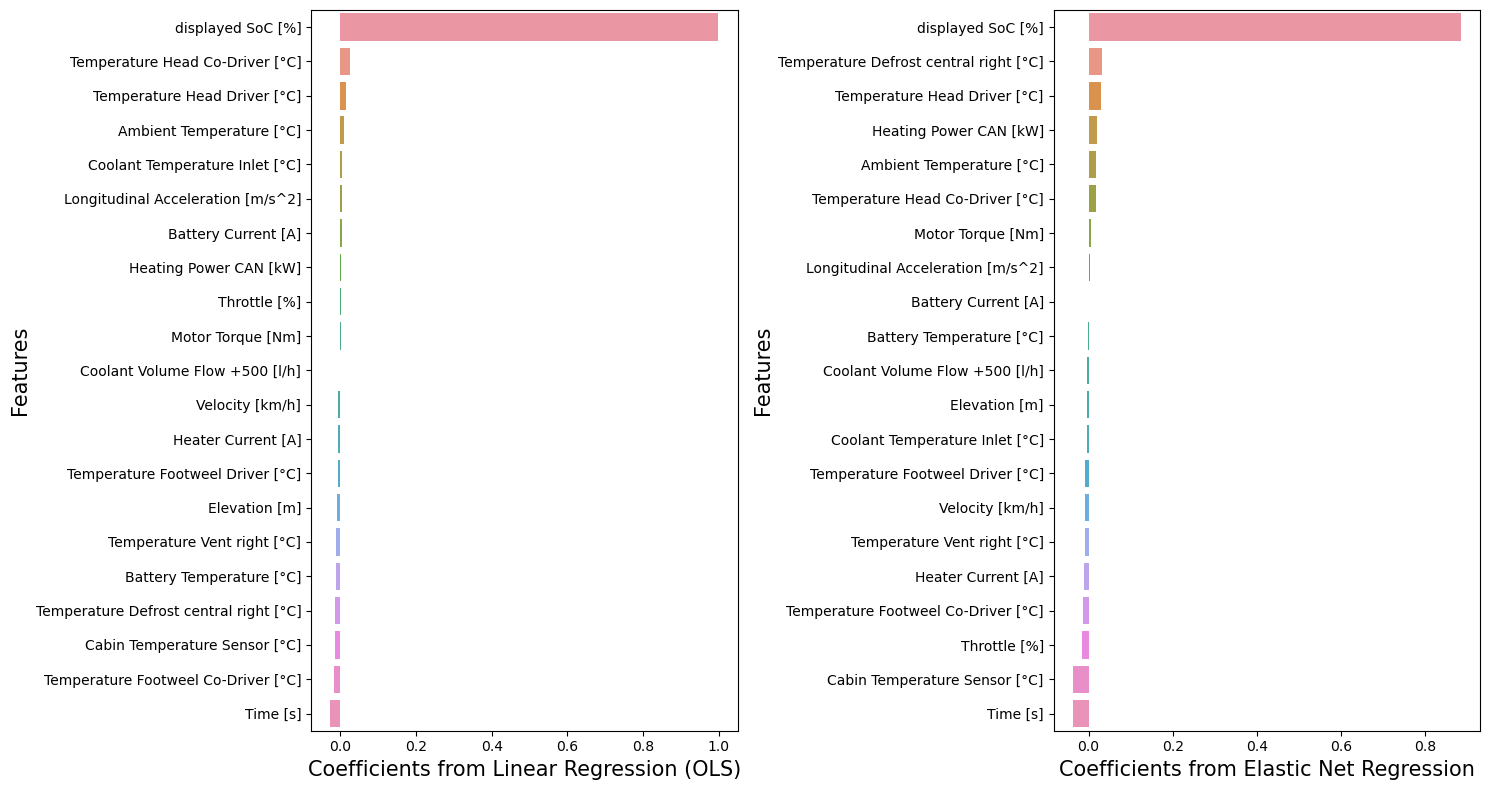

In [101]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_Model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(enet, 'Elastic Net Regression')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [102]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

# print the datarframe
score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0                  Linear Regression                         -        -   
1      Linear Regression (using SGD)                         -        -   
2  Ridge Regression (with alpha = 1)                         1        -   
3  Ridge Regression (with alpha = 2)                         2        -   
4                   Lasso Regression                      0.01        -   
5             Elastic Net Regression                       0.1     0.01   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.997288        0.997287   0.052400  19.925822  
1   0.997277        0.997277   0.052500  20.174669  
2   0.997288        0.997287   0.052400  19.925425  
3   0.997288        0.997287   0.052400  19.925028  
4   0.996290        0.996289   0.061500  25.221804  
5   0.987751        0.987750   0.110900  32.474924

In [103]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.1} 

RMSE on test set: 0.0524


In [104]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

# print the datarframe
score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0                      Linear Regression                         -        -   
1          Linear Regression (using SGD)                         -        -   
2      Ridge Regression (with alpha = 1)                         1        -   
3      Ridge Regression (with alpha = 2)                         2        -   
4                       Lasso Regression                      0.01        -   
5                 Elastic Net Regression                       0.1     0.01   
6  Ridge Regression (using GridSearchCV)                  0.100000        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.997288        0.997287   0.052400  19.925822  
1   0.997277        0.997277   0.052500  20.174669  
2   0.997288        0.997287   0.052400  19.925425  
3   0.997288        0.997287   0.052400  19.925028  
4   0.996290        0.996289   0.061500  25.221804  
5   0.987751        0.987750   0.110900  32.474924  
6   0.997288        0.997287   0.052400  19.925782

In [105]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 1e-08} 

RMSE on test set: 0.0524


In [106]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

# print the datarframe
score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0                      Linear Regression                         -        -   
1          Linear Regression (using SGD)                         -        -   
2      Ridge Regression (with alpha = 1)                         1        -   
3      Ridge Regression (with alpha = 2)                         2        -   
4                       Lasso Regression                      0.01        -   
5                 Elastic Net Regression                       0.1     0.01   
6  Ridge Regression (using GridSearchCV)                  0.100000        -   
7  Lasso Regression (using GridSearchCV)                  0.000000        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.997288        0.997287   0.052400  19.925822  
1   0.997277        0.997277   0.052500  20.174669  
2   0.997288        0.997287   0.052400  19.925425  
3   0.997288        0.997287   0.052400  19.925028  
4   0.996290        0.996289   0.061500  25.221804  
5   0.987751        0.987750   0.110900  32.474924  
6   0.997288        0.997287   0.052400  19.925782  
7   0.997288        0.997287   0.052400  19.925833

In [107]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.01} 

RMSE on test set: 0.0524


In [108]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# print the datarframe
score_card

Model_Name Alpha (Wherever Required)  \
0                            Linear Regression                         -   
1                Linear Regression (using SGD)                         -   
2            Ridge Regression (with alpha = 1)                         1   
3            Ridge Regression (with alpha = 2)                         2   
4                             Lasso Regression                      0.01   
5                       Elastic Net Regression                       0.1   
6        Ridge Regression (using GridSearchCV)                  0.100000   
7        Lasso Regression (using GridSearchCV)                  0.000000   
8  Elastic Net Regression (using GridSearchCV)                  0.000100   

  l1-ratio  R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0        -   0.997288        0.997287   0.052400  19.925822  
1        -   0.997277        0.997277   0.052500  20.174669  
2        -   0.997288        0.997287   0.052400  19.925425  
3        -   0.997288        0.997287   0.052400  19.925028  
4        -   0.996290        0.996289   0.061500  25.221804  
5     0.01   0.987751        0.987750   0.110900  32.474924  
6        -   0.997288        0.997287   0.052400  19.925782  
7        -   0.997288        0.997287   0.052400  19.925833  
8 0.010000   0.997288        0.997287   0.052400  19.919453

In [109]:
# sort the dataframe 'score_card' on 'Test_RMSE' in an ascending order using 'sort_values' 
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

# color the cell in the column 'Test_RMSE' having minimum RMSE value
# 'style.highlight_min' assigns color to the minimum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

**Interpretation:** We can see that Elastic Net regression with alpha = 0.000100 has the least Test_RMSE and Test_MAPE. Here, Elastic Net regression with alpha = 2 seems to deal with the problem of overfitting efficiently.